In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
df_SD = pd.read_csv('SecurityDelay.csv')
df_CD = pd.read_csv('CarrierDelay.csv')
df_NASD = pd.read_csv('NASDelay.csv')

In [3]:
df_SD['SecurityDelayMean'].median()

0.035495783455006716

In [4]:
'''
Cette fonction prédit le temps de retard total en minutes et prend en paramètres:
- compagnie: le code de la compagnie aérienne uilisée pour le voyage
- mois : le mois pendant lequel le voyage a lieu. Ici le mois est utilisé par soucis simplicité de programmation sinon
         on devrait plutôt renseigner la date(jour, mois, année)
- temperature : la valeur de la temperature (en Fahrenheit)
- relativeHumidity : la proportion d'humidité (en Pourcentage)
- windSpeed: la vitesse du vent (en miles par heure)
- heure : l'heure de départ (en heure)
- aeroport: le code de l'aeroport de départ

Cette fonction fait une requête dans les differents fichiers csv pour recupérer les valeurs de SecurityDelay, 
CarrierDelay,NASDelay
'''


def prediction(compagnie,mois,temperature,relativeHumidity,windSpeed,visibility,heure,aeroport):
    WeatherDelay=0.2362*temperature+0.2887*relativeHumidity+0.3618*windSpeed+0.6123*visibility
    SecurityDelay = df_SD[(df_SD['Month'] == mois) & (df_SD['Origin'] == aeroport)]['SecurityDelayMean'].values[0]
    CarrierDelay = df_CD[(df_CD['Month'] == mois) & (df_CD['UniqueCarrier'] == compagnie)]['CarrierDelayMean'].values[0]
    NASDelay = df_NASD[(df_NASD['Hour'] == heure)]['NASDelayMean'].values[0]
    tempsDeRetardTotal=WeatherDelay+SecurityDelay+CarrierDelay+NASDelay
    
    return tempsDeRetardTotal,SecurityDelay,CarrierDelay

# Exemples de prédicion

In [5]:
prediction('AA','April',71,49.66,18.9,10,19,'IND')

(76.28489116190781, 0.04087591240875912, 17.61548277328796)

In [6]:
prediction('WN','January',16.6,70.99,8.1,10,17,'IND')

(63.303503076289644, 0.3244949494949495, 10.618112995934391)

# Comparaison temps de retard total réél et temps de retard total prédit

In [7]:
# Convertion des numeros des mois en chaine de caractères
def numToMonth(x):
    if x==1:
        return "January"
    if x==2:
        return "February"
    if x==3:
        return "March"
    if x==4:
        return "April"
    if x==5:
        return "May"
    if x==6:
        return "June"
    if x==7:
        return "July"
    if x==8:
        return "August"
    if x==9:
        return "September"
    if x==10:
        return "October"
    if x==11:
        return "November"
    if x==12:
        return "December"

In [8]:
df=pd.read_csv('Jointed_ficher_v1.csv')

In [9]:
df['Month']= df['Month'].apply(lambda x : numToMonth(x) )

In [10]:
df_RP=df.loc[:,['Start_Date','Month','Hour','UniqueCarrier','Origin','Temperature','Relative Humidity','Wind Speed','Visibility','ArrDelay']]
df_RP.head()

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay
0,2008-01-03 17:00:00,January,17,WN,IND,16.6,70.99,8.1,10.0,34.0
1,2008-01-03 17:00:00,January,17,EV,IND,16.6,70.99,8.1,10.0,49.0
2,2008-01-03 17:00:00,January,17,9E,IND,16.6,70.99,8.1,10.0,201.0
3,2008-01-03 18:00:00,January,18,WN,IND,19.1,67.40,7.7,10.0,57.0
4,2008-01-03 18:00:00,January,18,NW,IND,19.1,67.40,7.7,10.0,24.0


In [11]:
df_RP['PredictWeatherDelay']=0.2362*df_RP['Temperature']+0.2887*df_RP['Relative Humidity']+0.3618*df_RP['Wind Speed']+0.6123*df_RP['Visibility']  

In [12]:
df_RP=pd.merge(df_RP, df_SD,on=['Month','Origin'])

In [13]:
df_RP=pd.merge(df_RP, df_CD,on=['Month','UniqueCarrier'])

In [14]:
df_RP=pd.merge(df_RP, df_NASD,on=['Hour'])

In [15]:
df_RP['PredictDelay']=df_RP['PredictWeatherDelay']+df_RP['SecurityDelayMean']+df_RP['CarrierDelayMean']+df_RP['NASDelayMean']
df_RP.head()

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay,PredictWeatherDelay,SecurityDelayMean,CarrierDelayMean,NASDelayMean,PredictDelay
0,2008-01-03 17:00:00,January,17,WN,IND,16.6,70.99,8.1,10.0,34.0,33.469313,0.324495,10.618113,18.891582,63.303503
1,2008-01-05 17:00:00,January,17,WN,IND,41.1,80.29,10.2,10.0,51.0,42.700903,0.324495,10.618113,18.891582,72.535093
2,2008-01-07 17:00:00,January,17,WN,IND,65.0,71.63,16.1,10.0,382.0,47.980561,0.324495,10.618113,18.891582,77.814751
3,2008-01-13 17:00:00,January,17,WN,IND,32.1,90.95,13.9,0.7,23.0,39.296915,0.324495,10.618113,18.891582,69.131105
4,2008-01-23 17:00:00,January,17,WN,IND,23.1,56.99,8.4,10.0,37.0,31.071353,0.324495,10.618113,18.891582,60.905543


In [16]:
def reduceTime(x):
    if x<60:
        return x-15
    if (x>=60 and x<180):
        return x-30
    if x>=180:
        return x-60

In [17]:
def addTime(x):
    if x<60:
        return x+15
    if (x>=60 and x<180):
        return x+30
    if x>=180:
        return x+60

In [18]:
df_RP['PredictDelayLess']=df_RP['PredictDelay'].apply(lambda x : reduceTime(x))
df_RP['PredictDelayMore']=df_RP['PredictDelay'].apply(lambda x : addTime(x))

In [19]:
df_RP

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay,PredictWeatherDelay,SecurityDelayMean,CarrierDelayMean,NASDelayMean,PredictDelay,PredictDelayLess,PredictDelayMore
0,2008-01-03 17:00:00,January,17,WN,IND,16.6,70.99,8.1,10.0,34.0,33.469313,0.324495,10.618113,18.891582,63.303503,33.303503,93.303503
1,2008-01-05 17:00:00,January,17,WN,IND,41.1,80.29,10.2,10.0,51.0,42.700903,0.324495,10.618113,18.891582,72.535093,42.535093,102.535093
2,2008-01-07 17:00:00,January,17,WN,IND,65.0,71.63,16.1,10.0,382.0,47.980561,0.324495,10.618113,18.891582,77.814751,47.814751,107.814751
3,2008-01-13 17:00:00,January,17,WN,IND,32.1,90.95,13.9,0.7,23.0,39.296915,0.324495,10.618113,18.891582,69.131105,39.131105,99.131105
4,2008-01-23 17:00:00,January,17,WN,IND,23.1,56.99,8.4,10.0,37.0,31.071353,0.324495,10.618113,18.891582,60.905543,30.905543,90.905543
5,2008-01-27 17:00:00,January,17,WN,IND,35.1,62.77,10.2,9.6,35.0,35.980759,0.324495,10.618113,18.891582,65.814949,35.814949,95.814949
6,2008-01-29 17:00:00,January,17,WN,IND,47.0,90.80,12.0,2.2,34.0,43.004020,0.324495,10.618113,18.891582,72.838210,42.838210,102.838210
7,2008-01-31 17:00:00,January,17,WN,IND,24.2,53.23,12.3,10.0,21.0,31.656681,0.324495,10.618113,18.891582,61.490871,31.490871,91.490871
8,2008-01-31 17:00:00,January,17,WN,IND,24.2,53.23,12.3,10.0,110.0,31.656681,0.324495,10.618113,18.891582,61.490871,31.490871,91.490871
9,2008-01-01 17:00:00,January,17,WN,IND,23.1,69.75,18.6,2.8,135.0,34.036965,0.324495,10.618113,18.891582,63.871155,33.871155,93.871155


# Calcul du score R2 (qualité de prédiction d'une regression linéaire)

In [20]:
moyenne=df_RP['ArrDelay'].mean()
moyenne

55.71428236849833

In [21]:

df_RP['SSEi']=(df_RP['PredictDelay']-moyenne)**2

df_RP['SSELessi']=(df_RP['PredictDelayLess']-moyenne)**2

df_RP['SSEMorei']=(df_RP['PredictDelayMore']-moyenne)**2

df_RP['SSTi']=(df_RP['ArrDelay']-moyenne)**2

df_RP.head()

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay,...,SecurityDelayMean,CarrierDelayMean,NASDelayMean,PredictDelay,PredictDelayLess,PredictDelayMore,SSEi,SSELessi,SSEMorei,SSTi
0,2008-01-03 17:00:00,January,17,WN,IND,16.6,70.99,8.1,10.0,34.0,...,0.324495,10.618113,18.891582,63.303503,33.303503,93.303503,57.596271,502.243028,1412.949513,471.510059
1,2008-01-05 17:00:00,January,17,WN,IND,41.1,80.29,10.2,10.0,51.0,...,0.324495,10.618113,18.891582,72.535093,42.535093,102.535093,282.939673,173.691030,2192.188315,22.224458
2,2008-01-07 17:00:00,January,17,WN,IND,65.0,71.63,16.1,10.0,382.0,...,0.324495,10.618113,18.891582,77.814751,47.814751,107.814751,488.430717,62.402595,2714.458840,106462.369530
3,2008-01-13 17:00:00,January,17,WN,IND,32.1,90.95,13.9,0.7,23.0,...,0.324495,10.618113,18.891582,69.131105,39.131105,99.131105,180.011132,275.001769,1885.020494,1070.224271
4,2008-01-23 17:00:00,January,17,WN,IND,23.1,56.99,8.4,10.0,37.0,...,0.324495,10.618113,18.891582,60.905543,30.905543,90.905543,26.949188,615.473545,1238.424830,350.224365


In [22]:
r2_scoreMe=df_RP['SSEi'].sum()/df_RP['SSTi'].sum()
r2_scoreMe

0.14046576096854224

In [23]:
r2_scoreLess=df_RP['SSELessi'].sum()/df_RP['SSTi'].sum()
r2_scoreLess

0.06190658095144235

In [24]:
r2_scoreMore=df_RP['SSEMorei'].sum()/df_RP['SSTi'].sum()
r2_scoreMore

0.8019938907516617

In [25]:
df_RP['ArrDelay']=df_RP['ArrDelay'].astype(float)

In [26]:
#df_RP['ArrDelay']

In [27]:
#type(list(df_RP['ArrDelay'].values))

In [28]:
r2_score(list(df_RP['ArrDelay'].values),list(df_RP['PredictDelay'].values))

-0.11650498971017975

In [29]:
r2_score(df_RP['ArrDelay'].values,df_RP['PredictDelayLess'].values)

-0.04265126579145928

In [30]:
r2_score(df_RP['ArrDelay'].values,df_RP['PredictDelayMore'].values)

-0.7733276633949213

In [31]:
print('Mean Absolute Error:', mean_absolute_error(df_RP['ArrDelay'].values,df_RP['PredictDelayLess'].values))
print('Mean Squared Error:', mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelayLess'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelayLess'].values)))

Mean Absolute Error: 33.09941659375082
Mean Squared Error: 3070.535281469194
Root Mean Squared Error: 55.41241089746226


In [32]:
median_absolute_error(df_RP['ArrDelay'].values,df_RP['PredictDelay'].values)

42.156813292842386

In [33]:
print('Mean Absolute Error:', mean_absolute_error(df_RP['ArrDelay'].values,df_RP['PredictDelay'].values))
print('Mean Squared Error:', mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelay'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelay'].values)))

Mean Absolute Error: 44.210020223099704
Mean Squared Error: 3288.029349141168
Root Mean Squared Error: 57.34134066396746


In [34]:
print('Mean Absolute Error:', mean_absolute_error(df_RP['ArrDelay'].values,df_RP['PredictDelayMore'].values))
print('Mean Squared Error:', mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelayMore'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_RP['ArrDelay'].values,df_RP['PredictDelayMore'].values)))

Mean Absolute Error: 63.27622746925142
Mean Squared Error: 5222.32632780259
Root Mean Squared Error: 72.26566493019067


# Calcul du score par compagnie, par aéroport et par mois (cas de AA dans l'aéroport Indianapolis en Janvier)

In [46]:
df_RP_AA_IND_January=df_RP[(df_RP['UniqueCarrier']=='AA') & (df_RP['Origin']=='IND') & (df_RP['Month']=='January') ]
df_RP_AA_IND_January=df_RP_AA_IND_January.drop(['SSEi', 'SSELessi', 'SSEMorei', 'SSTi'], axis=1)
print(df_RP_AA_IND_January.shape)

(54, 17)


In [47]:
df_RP_AA_IND_January

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay,PredictWeatherDelay,SecurityDelayMean,CarrierDelayMean,NASDelayMean,PredictDelay,PredictDelayLess,PredictDelayMore
91614,2008-01-03 18:00:00,January,18,AA,IND,19.1,67.40,7.7,10.0,19.0,32.878660,0.324495,15.411948,16.628329,65.243433,35.243433,95.243433
91615,2008-01-05 18:00:00,January,18,AA,IND,41.6,80.08,11.8,9.6,69.0,43.092336,0.324495,15.411948,16.628329,75.457109,45.457109,105.457109
91616,2008-01-18 18:00:00,January,18,AA,IND,28.6,56.73,10.4,10.0,95.0,33.018991,0.324495,15.411948,16.628329,65.383764,35.383764,95.383764
91617,2008-01-28 18:00:00,January,18,AA,IND,43.6,41.05,15.2,10.0,153.0,33.771815,0.324495,15.411948,16.628329,66.136588,36.136588,96.136588
91618,2008-01-21 18:00:00,January,18,AA,IND,25.6,36.42,11.2,10.0,138.0,26.736334,0.324495,15.411948,16.628329,59.101107,44.101107,74.101107
91619,2008-01-14 18:00:00,January,18,AA,IND,28.1,71.66,15.9,10.0,75.0,39.201082,0.324495,15.411948,16.628329,71.565855,41.565855,101.565855
91620,2008-01-10 18:00:00,January,18,AA,IND,44.0,70.78,13.0,10.0,93.0,41.653386,0.324495,15.411948,16.628329,74.018159,44.018159,104.018159
91621,2008-01-02 18:00:00,January,18,AA,IND,10.1,69.65,14.0,8.7,57.0,32.885785,0.324495,15.411948,16.628329,65.250558,35.250558,95.250558
91622,2008-01-01 18:00:00,January,18,AA,IND,22.5,71.45,16.3,3.9,138.0,34.227425,0.324495,15.411948,16.628329,66.592198,36.592198,96.592198
91623,2008-01-07 18:00:00,January,18,AA,IND,66.8,67.30,24.9,10.0,238.0,50.339490,0.324495,15.411948,16.628329,82.704263,52.704263,112.704263


In [63]:
def nearestValue(row):
    nearest=row['PredictDelay']
    difference= abs(row['ArrDelay']-row['PredictDelay'])
    
    if (abs(row['ArrDelay']-row['PredictDelayLess'])< difference ):
        difference=abs(row['ArrDelay']-row['PredictDelayLess'])
        nearest=row['PredictDelayLess']
    
    if (abs(row['ArrDelay']-row['PredictDelayMore'])< difference ):
        difference=abs(row['ArrDelay']-row['PredictDelayMore'])
        nearest=row['PredictDelayMore']
    
    return nearest

In [64]:
df_RP_AA_IND_January['NearestDelay'] = df_RP_AA_IND_January.apply (lambda row: nearestValue(row), axis=1)

In [65]:
df_RP_AA_IND_January

,Start_Date,Month,Hour,UniqueCarrier,Origin,Temperature,Relative Humidity,Wind Speed,Visibility,ArrDelay,PredictWeatherDelay,SecurityDelayMean,CarrierDelayMean,NASDelayMean,PredictDelay,PredictDelayLess,PredictDelayMore,nearestDelay,NearestDelay
91614,2008-01-03 18:00:00,January,18,AA,IND,19.1,67.40,7.7,10.0,19.0,32.878660,0.324495,15.411948,16.628329,65.243433,35.243433,95.243433,35.243433,35.243433
91615,2008-01-05 18:00:00,January,18,AA,IND,41.6,80.08,11.8,9.6,69.0,43.092336,0.324495,15.411948,16.628329,75.457109,45.457109,105.457109,75.457109,75.457109
91616,2008-01-18 18:00:00,January,18,AA,IND,28.6,56.73,10.4,10.0,95.0,33.018991,0.324495,15.411948,16.628329,65.383764,35.383764,95.383764,95.383764,95.383764
91617,2008-01-28 18:00:00,January,18,AA,IND,43.6,41.05,15.2,10.0,153.0,33.771815,0.324495,15.411948,16.628329,66.136588,36.136588,96.136588,96.136588,96.136588
91618,2008-01-21 18:00:00,January,18,AA,IND,25.6,36.42,11.2,10.0,138.0,26.736334,0.324495,15.411948,16.628329,59.101107,44.101107,74.101107,74.101107,74.101107
91619,2008-01-14 18:00:00,January,18,AA,IND,28.1,71.66,15.9,10.0,75.0,39.201082,0.324495,15.411948,16.628329,71.565855,41.565855,101.565855,71.565855,71.565855
91620,2008-01-10 18:00:00,January,18,AA,IND,44.0,70.78,13.0,10.0,93.0,41.653386,0.324495,15.411948,16.628329,74.018159,44.018159,104.018159,104.018159,104.018159
91621,2008-01-02 18:00:00,January,18,AA,IND,10.1,69.65,14.0,8.7,57.0,32.885785,0.324495,15.411948,16.628329,65.250558,35.250558,95.250558,65.250558,65.250558
91622,2008-01-01 18:00:00,January,18,AA,IND,22.5,71.45,16.3,3.9,138.0,34.227425,0.324495,15.411948,16.628329,66.592198,36.592198,96.592198,96.592198,96.592198
91623,2008-01-07 18:00:00,January,18,AA,IND,66.8,67.30,24.9,10.0,238.0,50.339490,0.324495,15.411948,16.628329,82.704263,52.704263,112.704263,112.704263,112.704263


In [66]:
r2_score(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelay'].values)

-0.009706829626748181

In [67]:
r2_score(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelayLess'].values)

-0.09357711876522612

In [68]:
r2_score(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelayMore'].values)

-0.527550411876885

In [69]:
r2_score(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['NearestDelay'].values)

0.6124165178143308

In [51]:
print('Mean Absolute Error:', mean_absolute_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelay'].values))
print('Mean Squared Error:', mean_squared_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelay'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['PredictDelay'].values)))

Mean Absolute Error: 44.74785839410677
Mean Squared Error: 2978.541309761449
Root Mean Squared Error: 54.57601405160924


In [70]:
print('Mean Absolute Error:', mean_absolute_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['NearestDelay'].values))
print('Mean Squared Error:', mean_squared_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['NearestDelay'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_RP_AA_IND_January['ArrDelay'].values,df_RP_AA_IND_January['NearestDelay'].values)))

Mean Absolute Error: 21.58494277648338
Mean Squared Error: 1143.3352521721165
Root Mean Squared Error: 33.813240781861126


# Calcul du score par compagnie, par aéroport et par mois (généralisation)

In [94]:
#Création de la liste des aéroports
a=df_RP['Origin'].value_counts()
listAirports=[]
for i in range(len(a.index.values)): 
    listAirports.append(a.index.values[i])
print(len(listAirports))    

42


In [95]:
#Création de la liste des compagnies
a=df_RP['UniqueCarrier'].value_counts()
listCompany=[]
for i in range(len(a.index.values)): 
    listCompany.append(a.index.values[i])
print(len(listCompany))  

20


In [96]:
#Création de la liste des compagnies
a=df_RP['Month'].value_counts()
listMonth=[]
for i in range(len(a.index.values)): 
    listMonth.append(a.index.values[i])
print(len(listMonth)) 

12


In [97]:
df_RP.shape

(1110138, 21)

In [98]:
df_score = pd.DataFrame(columns=['UniqueCarrier', 'Origin', 'Month', 'Score'])
for c in listCompany:
    for a in listAirports:
        for m in listMonth:
            df_temp=df_RP[(df_RP['UniqueCarrier']== c) & (df_RP['Origin']== a) & (df_RP['Month']== m)]
            df_temp=df_temp.drop(['SSEi', 'SSELessi', 'SSEMorei', 'SSTi'], axis=1)
            #print(df_temp.shape)
            if (df_temp.shape[0]!=0):
                df_temp['NearestDelay'] = df_temp.apply (lambda row: nearestValue(row), axis=1)
                score=r2_score(df_temp['ArrDelay'].values,df_temp['NearestDelay'].values)
                df_score = df_score.append({'UniqueCarrier': c, 'Origin': a , 'Month': m, 'Score': score}, ignore_index=True)
            
            #break
        #break
    #break
#print(df_temp)

C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\r

C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\r

C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\r

C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ismor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [99]:
df_score

,UniqueCarrier,Origin,Month,Score
0,WN,DEN,June,0.513022
1,WN,DEN,December,0.495798
2,WN,DEN,March,0.595878
3,WN,DEN,February,0.476430
4,WN,DEN,January,0.580406
5,WN,DEN,July,0.591712
6,WN,DEN,April,0.538499
7,WN,DEN,August,0.644030
8,WN,DEN,May,0.578841
9,WN,DEN,November,0.626901


In [100]:
df_score.to_csv('Score.csv',index = True)

In [158]:
df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL=df_score[(df_score['UniqueCarrier']!='AQ') & (df_score['UniqueCarrier']!='HA') & (df_score['UniqueCarrier']!='AS') & (df_score['UniqueCarrier']!='F9') & (df_score['UniqueCarrier']!='9E') & (df_score['UniqueCarrier']!='FL') & (df_score['Origin']!='PWM') & (df_score['Origin']!='SFO') & (df_score['Origin']!='MKE') & (df_score['Origin']!='RDU') & (df_score['Origin']!='TPA')]
df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL

,UniqueCarrier,Origin,Month,Score
0,WN,DEN,June,0.513022
1,WN,DEN,December,0.495798
2,WN,DEN,March,0.595878
3,WN,DEN,February,0.476430
4,WN,DEN,January,0.580406
5,WN,DEN,July,0.591712
6,WN,DEN,April,0.538499
7,WN,DEN,August,0.644030
8,WN,DEN,May,0.578841
9,WN,DEN,November,0.626901


In [159]:
df_score['Score'].mean()

-2.932667224138479

In [161]:
df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL['Score'].mean()

-0.7684113023681368

In [162]:
badScore=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL[df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL['Score']<0]
badScore

,UniqueCarrier,Origin,Month,Score
468,AA,CLT,September,-0.053923
650,AA,OAK,March,-1.105043
655,AA,OAK,August,-3.721092
954,UA,MIA,July,-0.665824
1060,UA,OAK,November,-0.342459
1066,UA,AUS,February,-6.136094
1074,UA,AUS,September,-1.128814
1089,UA,IND,March,-0.337323
1091,UA,IND,January,-0.035642
1186,DL,IAH,September,-0.826916


In [163]:
MediumScore=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL[(df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL['Score']>0) & (df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL['Score']<0.1)]
MediumScore

,UniqueCarrier,Origin,Month,Score
23,WN,DTW,September,0.050895
422,AA,LAS,December,0.079485
512,AA,SLC,August,0.061809
956,UA,MIA,August,0.080921
1062,UA,OAK,September,0.017680
1147,DL,DEN,May,0.034868
1210,DL,PHX,September,0.066528
1253,DL,MSP,April,0.024107
1430,DL,CLE,February,0.087485
1431,DL,CLE,January,0.016402


In [148]:
badScore['UniqueCarrier'].value_counts().index

Index(['YV', 'US', 'EV', 'OH', '9E', 'NW', 'XE', 'DL', 'OO', 'FL', 'UA', 'CO',
       'AA', 'B6', 'MQ'],
      dtype='object')

In [149]:
MediumScore['UniqueCarrier'].value_counts().index

Index(['NW', 'DL', 'XE', 'FL', 'YV', '9E', 'MQ', 'UA', 'US', 'AA', 'EV', 'OO',
       'CO', 'OH', 'WN', 'B6'],
      dtype='object')

In [150]:
MediumScore['Origin'].value_counts().index

Index(['CLE', 'PDX', 'LAS', 'DFW', 'SLC', 'MIA', 'DEN', 'SAN', 'PHX', 'DTW',
       'MCI', 'IAD', 'SEA', 'PHL', 'RDU', 'OAK', 'IAH', 'BOS', 'HOU', 'PIT',
       'FLL', 'BNA', 'DCA', 'ATL', 'CLT', 'MCO', 'AUS', 'MEM', 'MSP', 'LAX',
       'EWR', 'IND'],
      dtype='object')

In [151]:
df_score['Origin'].value_counts()

DTW    191
SAN    190
MCI    188
IND    186
LAS    186
RDU    186
ATL    180
LGA    180
PIT    179
DEN    178
PHL    177
LAX    177
PHX    177
EWR    176
DFW    174
AUS    172
BOS    171
CLT    168
DCA    160
ORD    160
SEA    159
MSP    159
MCO    157
BNA    157
CLE    154
IAD    154
PDX    153
IAH    147
TPA    143
SLC    143
FLL    142
MEM    131
MIA    130
MKE    130
JFK    119
OAK    108
CVG     97
HOU     84
PWM     80
MDW     70
DAL     36
SFO     20
Name: Origin, dtype: int64

In [152]:
badScore['Origin'].value_counts()

AUS    20
MCI    18
OAK    16
MIA    14
IND    14
MEM    13
MKE    13
FLL    13
IAH    10
BNA    10
IAD     9
DEN     9
CLT     8
CLE     8
SLC     8
PIT     7
HOU     7
DFW     7
LAX     7
SAN     6
MSP     5
SEA     5
TPA     5
MCO     5
PDX     5
DTW     3
LGA     3
LAS     3
PHL     3
DCA     3
BOS     2
MDW     2
EWR     2
PHX     2
RDU     1
ORD     1
JFK     1
Name: Origin, dtype: int64

# Quelques statistiques sur les qualités de prédiction

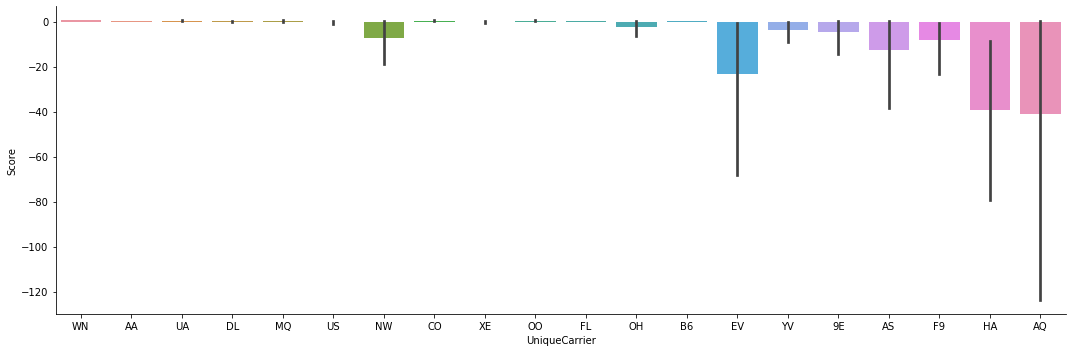

In [156]:
sns.catplot(x="UniqueCarrier", y="Score", data=df_score, kind="bar",height=5, aspect=3)

,Score
UniqueCarrier,
AA,0.458714
B6,0.408950
CO,0.449691
DL,0.238968
EV,-1.430631
MQ,0.252196
NW,-7.861503
OH,-0.480934
OO,0.395197


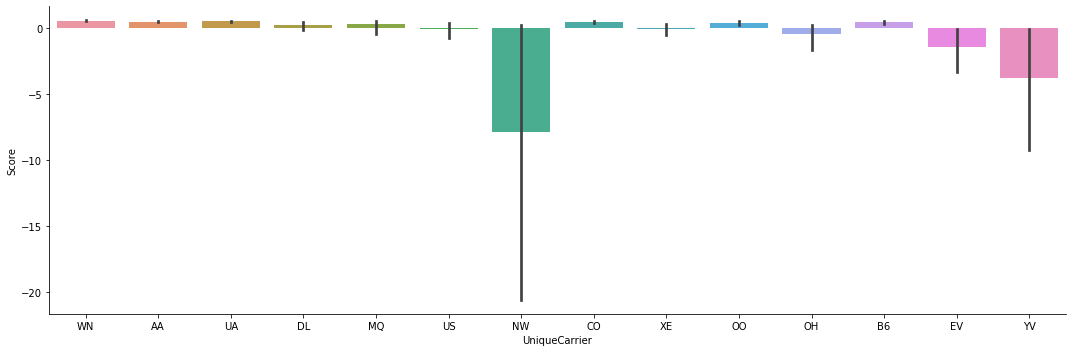

In [166]:
sns.catplot(x="UniqueCarrier", y="Score", data=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL, kind="bar",height=5, aspect=3)
resultat=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL.loc[:, ['UniqueCarrier','Score']].groupby('UniqueCarrier').mean()
resultat

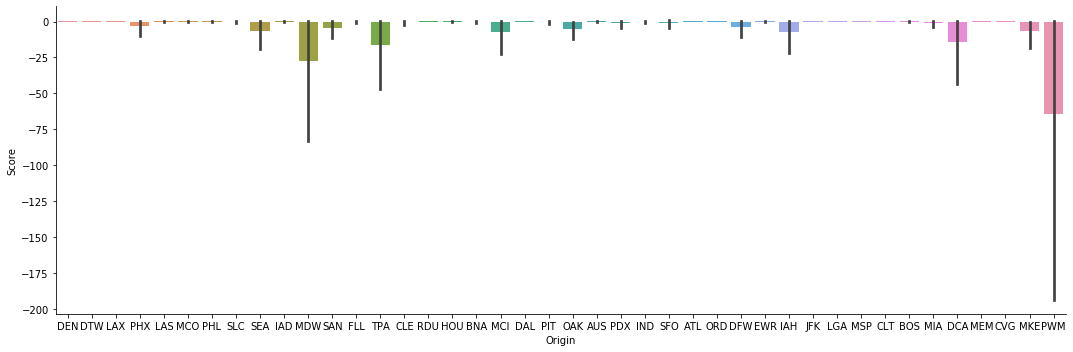

In [157]:
sns.catplot(x="Origin", y="Score", data=df_score, kind="bar",height=5, aspect=3)

,Score
Origin,
ATL,0.529892
AUS,0.173205
BNA,0.278556
BOS,0.175816
CLE,-0.609458
CLT,0.355342
CVG,0.511363
DAL,0.517499
DCA,0.461253


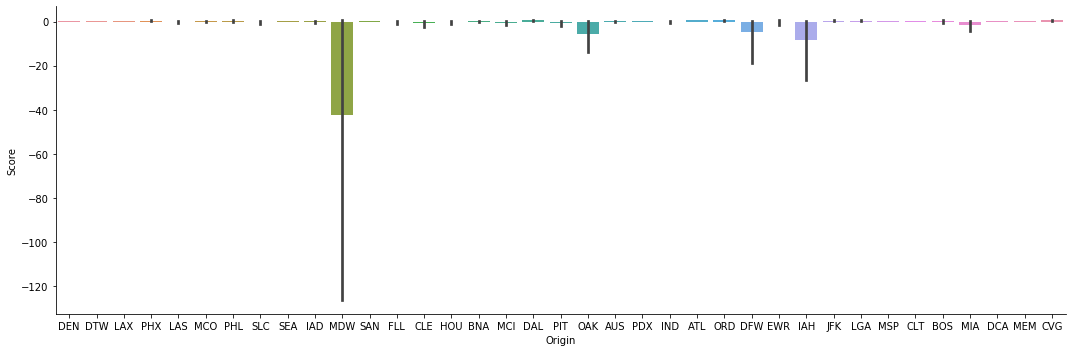

In [167]:
sns.catplot(x="Origin", y="Score", data=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL, kind="bar",height=5, aspect=3)
resultat1=df_score_without_AQ_HA_PWM_SFO_AS_F9_9E_FL.loc[:, ['Origin','Score']].groupby('Origin').mean()
resultat1